In [109]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Standarize the data

In [4]:
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

#### PCA to 2D

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [5]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


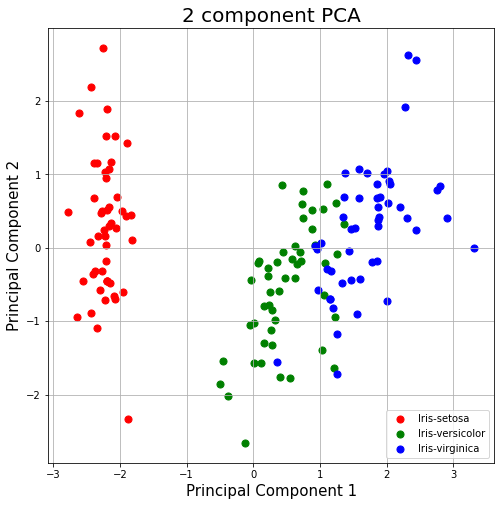

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [147]:
pca.explained_variance_ratio_


array([0.25625293, 0.25023711])

# Pheno data

In [3]:
import pandas as pd
df = pd.read_csv('data.csv')
columns = df.columns.values 
print(columns)
df.head()

['m0' 'm12' 'a0' 'tanbeta' 'Mh(1)' 'Mh(2)' 'obsratio' 'csq(tot)']


,m0,m12,a0,tanbeta,Mh(1),Mh(2),obsratio,csq(tot)
0,245.204558,2578.849915,2977.590954,1.131453,NaN,NaN,NaN,NaN
1,549.662491,1424.837947,2265.549024,14.145950,NaN,NaN,NaN,NaN
2,553.073892,3769.491699,2441.029584,59.620596,NaN,NaN,NaN,NaN
3,410.278278,4279.619411,3514.845790,59.426412,NaN,NaN,NaN,NaN
4,458.437531,2948.490166,1820.691367,53.547147,NaN,NaN,NaN,NaN


In [4]:
is_nan = df.isnull()['obsratio']
is_nan

0       True
1       True
2       True
3       True
4       True
        ... 
9995    True
9996    True
9997    True
9998    True
9999    True
Name: obsratio, Length: 10000, dtype: bool

In [5]:
phy = df[~is_nan]

nonphy = df[is_nan]
df['physical'] = ~is_nan
df.head()

,m0,m12,a0,tanbeta,Mh(1),Mh(2),obsratio,csq(tot),physical
0,245.204558,2578.849915,2977.590954,1.131453,NaN,NaN,NaN,NaN,False
1,549.662491,1424.837947,2265.549024,14.145950,NaN,NaN,NaN,NaN,False
2,553.073892,3769.491699,2441.029584,59.620596,NaN,NaN,NaN,NaN,False
3,410.278278,4279.619411,3514.845790,59.426412,NaN,NaN,NaN,NaN,False
4,458.437531,2948.490166,1820.691367,53.547147,NaN,NaN,NaN,NaN,False


In [6]:
nonphy.head()

,m0,m12,a0,tanbeta,Mh(1),Mh(2),obsratio,csq(tot)
0,245.204558,2578.849915,2977.590954,1.131453,NaN,NaN,NaN,NaN
1,549.662491,1424.837947,2265.549024,14.145950,NaN,NaN,NaN,NaN
2,553.073892,3769.491699,2441.029584,59.620596,NaN,NaN,NaN,NaN
3,410.278278,4279.619411,3514.845790,59.426412,NaN,NaN,NaN,NaN
4,458.437531,2948.490166,1820.691367,53.547147,NaN,NaN,NaN,NaN


### PCA on physical data points

In [233]:
from sklearn.preprocessing import StandardScaler
x = phy.values
x = StandardScaler().fit_transform(x)

In [234]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])


In [235]:
principalDf.head()


,principal component 1,principal component 2,principal component 3
0,1.156280,-1.792673,0.289907
1,1.647147,-1.104992,0.490399
2,1.298656,-0.635587,-0.110467
3,0.073261,-1.185605,-1.427016
4,2.063744,-1.351505,0.226488


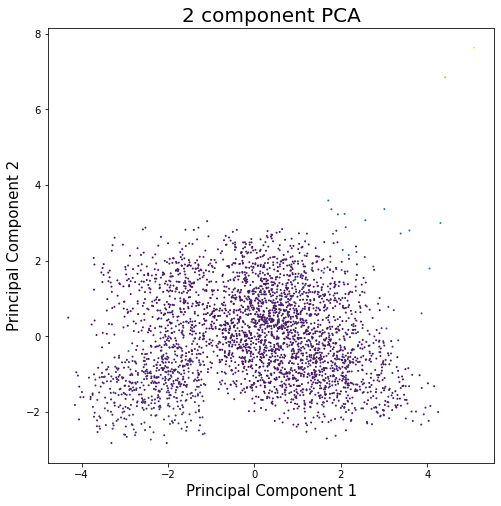

In [236]:
X = principalDf.values.T[0]
Y = principalDf.values.T[1]
z = principalDf.values.T[2]

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(X,Y,c=z, s=1 , alpha = 1)


In [237]:
pca.explained_variance_ratio_


array([0.36496078, 0.19162832, 0.14016713])

### PCA for differentiation between physical and non-physical

In [103]:
features = ['m0', 'm12', 'a0', 'tanbeta']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['physical']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [106]:
finalDf = pd.concat([principalDf, df[['physical']]], axis = 1)


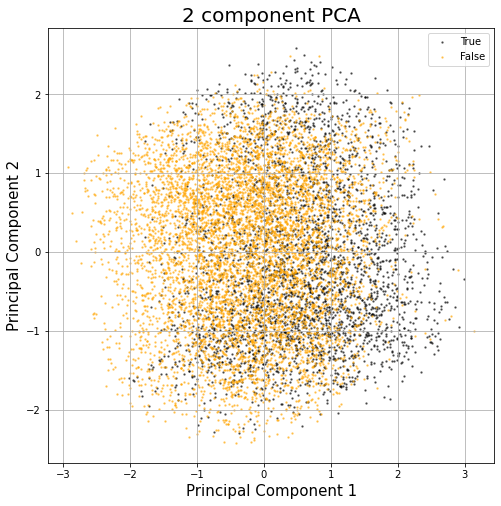

In [120]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [True, False]
colors = ['Black', 'Orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['physical'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 2, alpha=0.5)
    
ax.legend(targets)
ax.grid()

### PCA for differentiation between physical 125 and 93 GeV

In [193]:
mh1_low, mh1_high = 90,95
mh2_low, mh2_high = 120, 127
target = (phy['Mh(1)'] > mh1_low) & (phy['Mh(1)'] < mh1_high) & (phy['Mh(2)'] > mh2_low) & (phy['Mh(2)'] < mh2_high)


In [194]:
x = phy.values
x = StandardScaler().fit_transform(x)



In [195]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [196]:
principalDf['target'] = target.values

In [197]:
principalDf

,principal component 1,principal component 2,target
0,1.156280,-1.792673,False
1,1.647147,-1.104992,False
2,1.298656,-0.635587,False
3,0.073261,-1.185605,False
4,2.063744,-1.351505,False
...,...,...,...
3245,1.100859,1.243710,False
3246,0.408193,1.351299,False
3247,1.113811,-1.407611,False
3248,2.500163,0.215642,False


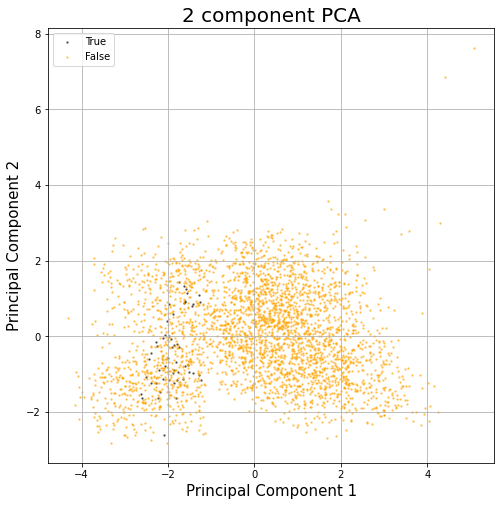

In [198]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [True, False]
colors = ['Black', 'Orange']
for target, color in zip(targets,colors):
    indicesToKeep = principalDf['target'] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 2, alpha=0.5)
    
ax.legend(targets)
ax.grid()

In [202]:
principalDf[principalDf['principal component 2'] > 6]

,principal component 1,principal component 2,target
292,5.080463,7.634272,False
1665,4.412939,6.851298,False


In [210]:
phy[phy['csq(tot)']<900]

,m0,m12,a0,tanbeta,Mh(1),Mh(2),obsratio,csq(tot),physical
48,758.271156,4359.459019,2982.383081,48.451299,120.141,169.220,1.22166,628.965,True
49,930.076780,3943.579834,2857.359786,50.509218,119.675,165.472,1.30077,799.358,True
50,932.397918,3740.350260,2797.541931,26.588490,120.125,171.205,1.23637,629.489,True
51,302.284276,4343.741712,3270.548459,15.928542,120.612,180.050,1.13225,628.356,True
52,834.412157,3620.877422,2566.034409,45.285123,121.129,197.925,1.03946,627.522,True
...,...,...,...,...,...,...,...,...,...
9977,831.959049,1522.437966,2723.399917,38.630411,117.117,146.873,5.06931,802.026,True
9984,791.518971,1634.937589,3029.261711,25.442934,116.183,140.402,1.24834,801.488,True
9987,400.790846,3315.054754,2984.358879,45.189366,120.936,200.288,1.08441,628.558,True
9988,997.436186,2222.970016,2265.242073,43.913079,119.740,186.997,1.46286,800.308,True


### PCA coloring each column

In [226]:
phy_2 = phy[phy['obsratio']<10]

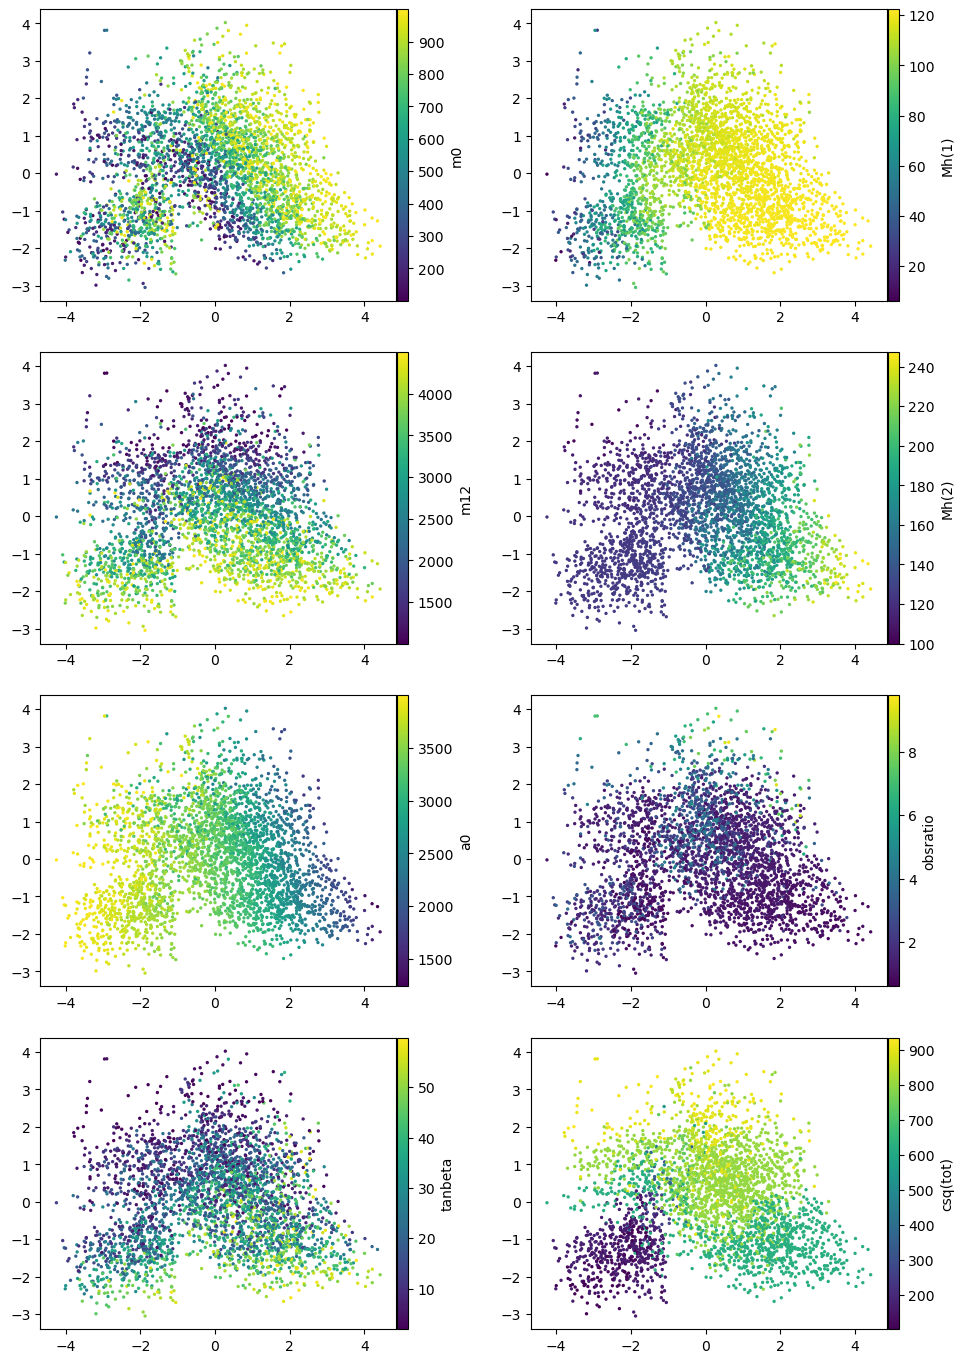

In [326]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


x = phy_2.values
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


fig, axs = plt.subplots(4, 2, figsize=(10,14))
axes = [(0,0), (1,0), (2,0), (3,0), (0,1), (1,1), (2,1), (3,1)]
for column, axis in zip(columns, axes):
    a,b = axis
    ax = axs[a,b]
    
    #ax.set_xlabel('pc1', fontsize = 15)
    #ax.set_ylabel('pc2', fontsize = 15)
    #ax.set_title('2 component PCA', fontsize = 20)

    
    im1 = ax.scatter(
        principalDf['principal component 1'], 
        principalDf['principal component 2'], 
        c = phy_2[column], 
        s = 2, alpha=1)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='3%', pad=0.01)
    cbar=fig.colorbar(im1, cax=cax, orientation='vertical')
    cbar.set_label(column)
    #cbar = plt.colorbar()    
    #cbar.set_label(column)
    #ax.legend(targets)
    #ax.grid()
fig.tight_layout(pad=2.0)
plt.show()


In [327]:
pca.explained_variance_ratio_

array([0.36363527, 0.20325181])

## Physical lagrangian parameters

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [97]:
features = ['m0', 'm12', 'a0', 'tanbeta']
xt = phy
# Separating out the features
x = xt.loc[:, features].values
# Separating out the target
#y = phy.loc[:,['physical']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [101]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(
    data = principalComponents, 
    columns = ['principal component 1', 'principal component 2']
    )

In [102]:
pca.explained_variance_ratio_

array([0.39600838, 0.30962394])

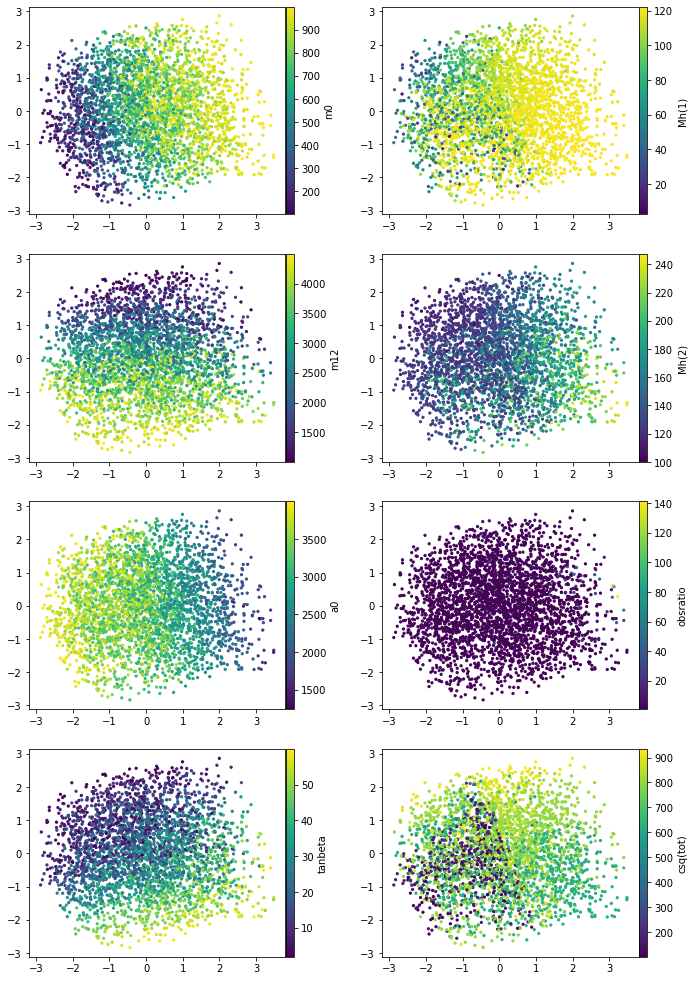

In [103]:
fig, axs = plt.subplots(4, 2, figsize=(10,14))
axes = [(0,0), (1,0), (2,0), (3,0), (0,1), (1,1), (2,1), (3,1)]
for column, axis in zip(columns, axes):
    a,b = axis
    ax = axs[a,b]
    
    #ax.set_xlabel('pc1', fontsize = 15)
    #ax.set_ylabel('pc2', fontsize = 15)
    #ax.set_title('2 component PCA', fontsize = 20)

    
    im1 = ax.scatter(
        principalDf['principal component 1'], 
        principalDf['principal component 2'], 
        c = xt[column], 
        s = 5, alpha=1)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='3%', pad=0.01)
    cbar=fig.colorbar(im1, cax=cax, orientation='vertical')
    cbar.set_label(column)
    #cbar = plt.colorbar()    
    #cbar.set_label(column)
    #ax.legend(targets)
    #ax.grid()
fig.tight_layout(pad=2.0)
plt.show()

### t-SNE

In [64]:
from sklearn.manifold import TSNE

embedding = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=200) #result has 2 features
X_transformed = embedding.fit_transform(x)

/home/mjad1g20/.conda/envs/rrlib/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 140 samples in 0.001s...
[t-SNE] Computed neighbors for 140 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 140 / 140
[t-SNE] Mean sigma: 0.452380
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.027390
[t-SNE] KL divergence after 1000 iterations: 0.400114


In [65]:
X = X_transformed.T[0]
Y = X_transformed.T[1]

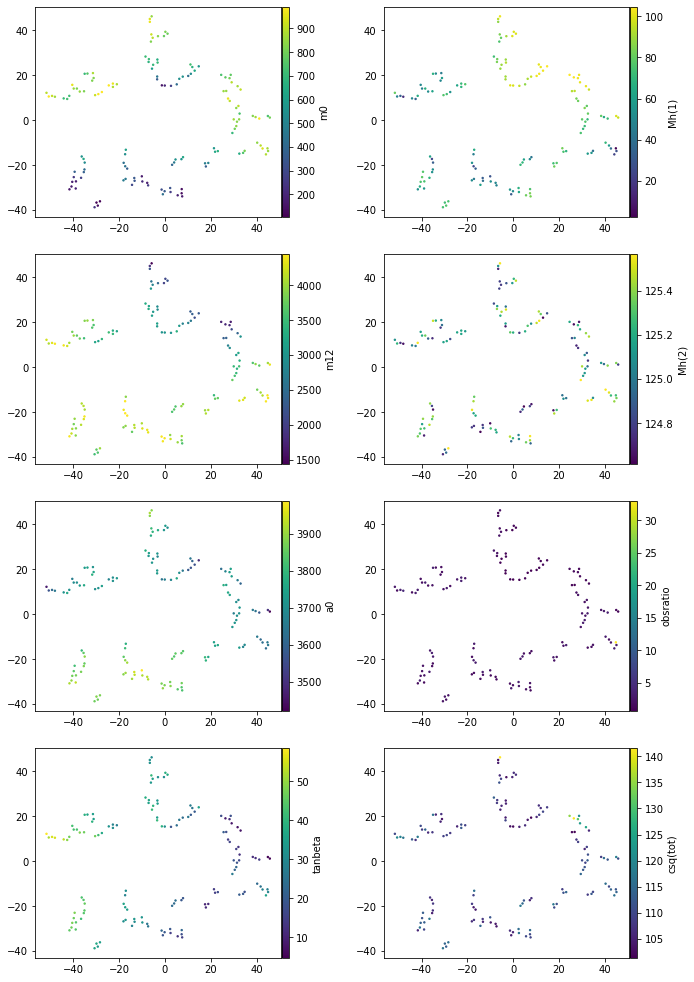

In [66]:
fig, axs = plt.subplots(4, 2, figsize=(10,14))
axes = [(0,0), (1,0), (2,0), (3,0), (0,1), (1,1), (2,1), (3,1)]
for column, axis in zip(columns, axes):
    a,b = axis
    ax = axs[a,b]
    
    #ax.set_xlabel('pc1', fontsize = 15)
    #ax.set_ylabel('pc2', fontsize = 15)
    #ax.set_title('2 component PCA', fontsize = 20)

    
    im1 = ax.scatter(
        X, 
        Y, 
        c = xt[column], 
        s = 2, alpha=1)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='3%', pad=0.01)
    cbar=fig.colorbar(im1, cax=cax, orientation='vertical')
    cbar.set_label(column)
    #cbar = plt.colorbar()    
    #cbar.set_label(column)
    #ax.legend(targets)
    #ax.grid()
fig.tight_layout(pad=2.0)
plt.show()

#### Physical vs non-physica t-SNE

In [301]:
features = ['m0', 'm12', 'a0', 'tanbeta']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['physical']].values

In [302]:
embedding = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200) #result has 2 features
X_transformed = embedding.fit_transform(x)

/home/mjad1g20/.conda/envs/rrlib/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.012s...
[t-SNE] Computed neighbors for 10000 samples in 0.315s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 133.253111
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.696068
[t-SNE] KL divergence after 1000 iterations: 1.135475


In [303]:
X = X_transformed.T[0]
Y = X_transformed.T[1]

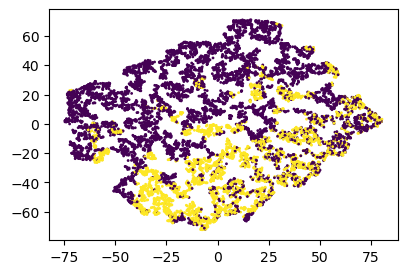

In [325]:
fig, ax = plt.subplots(figsize=(4.5, 3), dpi=100)
ax.scatter(X,Y, c=y,s = 1)
